In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
#loading the dataset
data= pd.read_csv("/content/drug200.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
pip install imblearn #oversampling and undersampling techniques to handle class imbalance in a dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import * 

from imblearn.over_sampling import SMOTE 
'''(Synthetic Minority Over-sampling Technique) is a technique for addressing class imbalance in a dataset
 by generating synthetic samples'''

'(Synthetic Minority Over-sampling Technique) is a technique for addressing class imbalance in a dataset\n by generating synthetic samples'

##Data Description

In [ ]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Missing Values 

In [ ]:
data.isna().sum() #checking missed values in the dataframe

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
data.nunique() # returning unique elements

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [ ]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,5) #valuating data

## Feature's selection

Text(0.5, 1.0, 'Age')

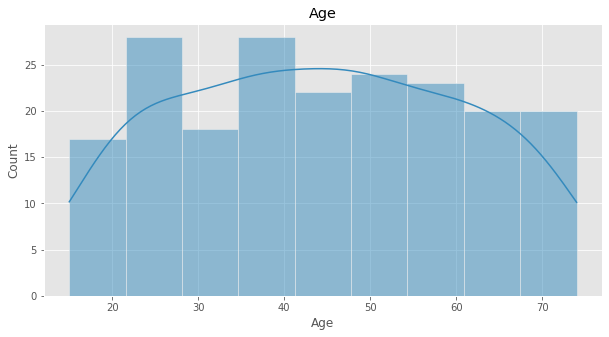

In [ ]:
sns.histplot(data=data , x='Age' , kde=True)
plt.title('Age')


Text(0.5, 1.0, 'Na_to_K')

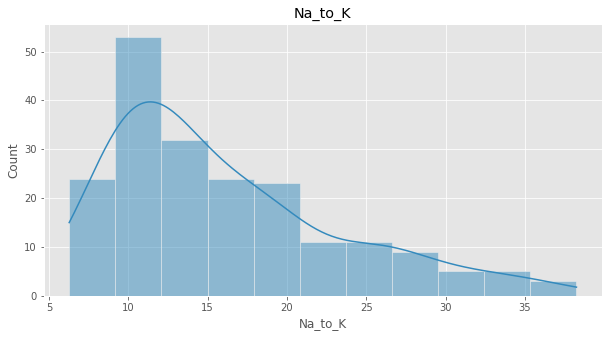

In [ ]:
sns.histplot(data=data , x='Na_to_K' , kde=True)
plt.title('Na_to_K')

## Features with target

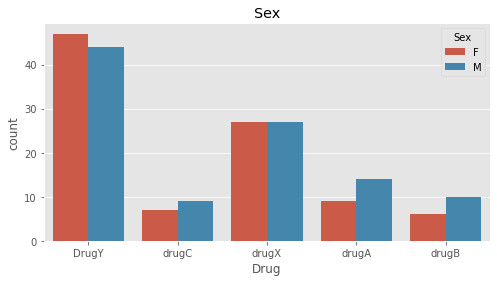

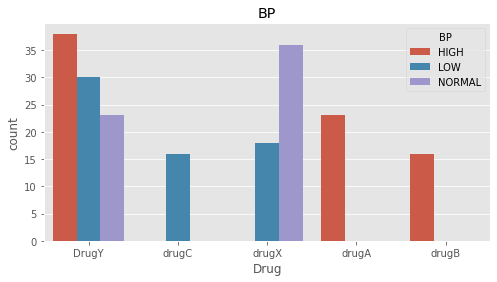

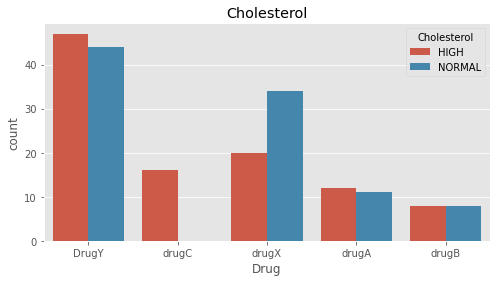

In [ ]:
for i in data.columns : 
    if (data[i].dtype == 'object') & ( i != 'Drug') : 
        plt.figure(figsize=(8,4))
        sns.countplot(data=data , hue=i , x='Drug')
        plt.title(i)
        plt.show()

In [ ]:
data_final = data.copy() #copy of the variable data

## Features Engineering 

In [ ]:
for i in data_final.drop('Drug' , axis=1).columns : 
    if data_final[i].dtype == 'object' : 
        dummies = pd.get_dummies(data[i] , prefix=f'{i}_')
        data_final = pd.concat([data_final , dummies] , axis=1)
        data_final = data_final.drop(i , axis=1)


In [ ]:
data_final.head()

,Age,Na_to_K,Drug,Sex__F,Sex__M,BP__HIGH,BP__LOW,BP__NORMAL,Cholesterol__HIGH,Cholesterol__NORMAL
0,23,25.355,DrugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,DrugY,1,0,0,1,0,1,0


In [ ]:
features = data_final.drop('Drug' , axis=1)
target = data_final['Drug']

In [ ]:
features.head()

,Age,Na_to_K,Sex__F,Sex__M,BP__HIGH,BP__LOW,BP__NORMAL,Cholesterol__HIGH,Cholesterol__NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [ ]:
target.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(features , target , test_size=0.2 , shuffle=True  )

In [ ]:
print(f'Train Data = {len(x_train)}')
print(f'Test Data = {len(x_test)}')

Train Data = 160
Test Data = 40


In [ ]:
scaler = StandardScaler() #normalisation of data
#he distribution of each feature is centered around 0 with a standard deviation of 1

In [ ]:
#standardisation of dataset

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Fix Imbalance Data

In [ ]:
smote = SMOTE()

In [ ]:
x_train , y_train = smote.fit_resample(x_train , y_train)

In [ ]:
y_train.value_counts()

DrugY    77
drugB    77
drugX    77
drugA    77
drugC    77
Name: Drug, dtype: int64

## Modeling 

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train , y_train)

LogisticRegression()

In [ ]:
prediction = model.predict(x_test) 

In [ ]:
accuracy_score(y_test , prediction)

0.975

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

       DrugY       0.93      1.00      0.97        14
       drugA       1.00      1.00      1.00         6
       drugB       1.00      0.83      0.91         6
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11

    accuracy                           0.97        40
   macro avg       0.99      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [ ]:
confusion_matrix(y_test , prediction) #defining the sa

array([[14,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 1,  0,  5,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 11]])

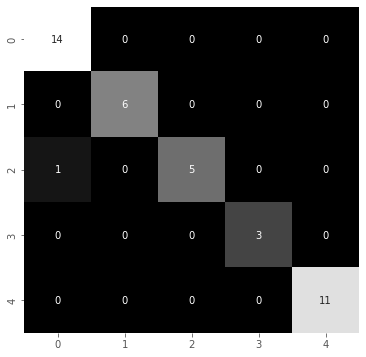

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test , prediction ) , cbar=False , annot=True , cmap='Greys_r')